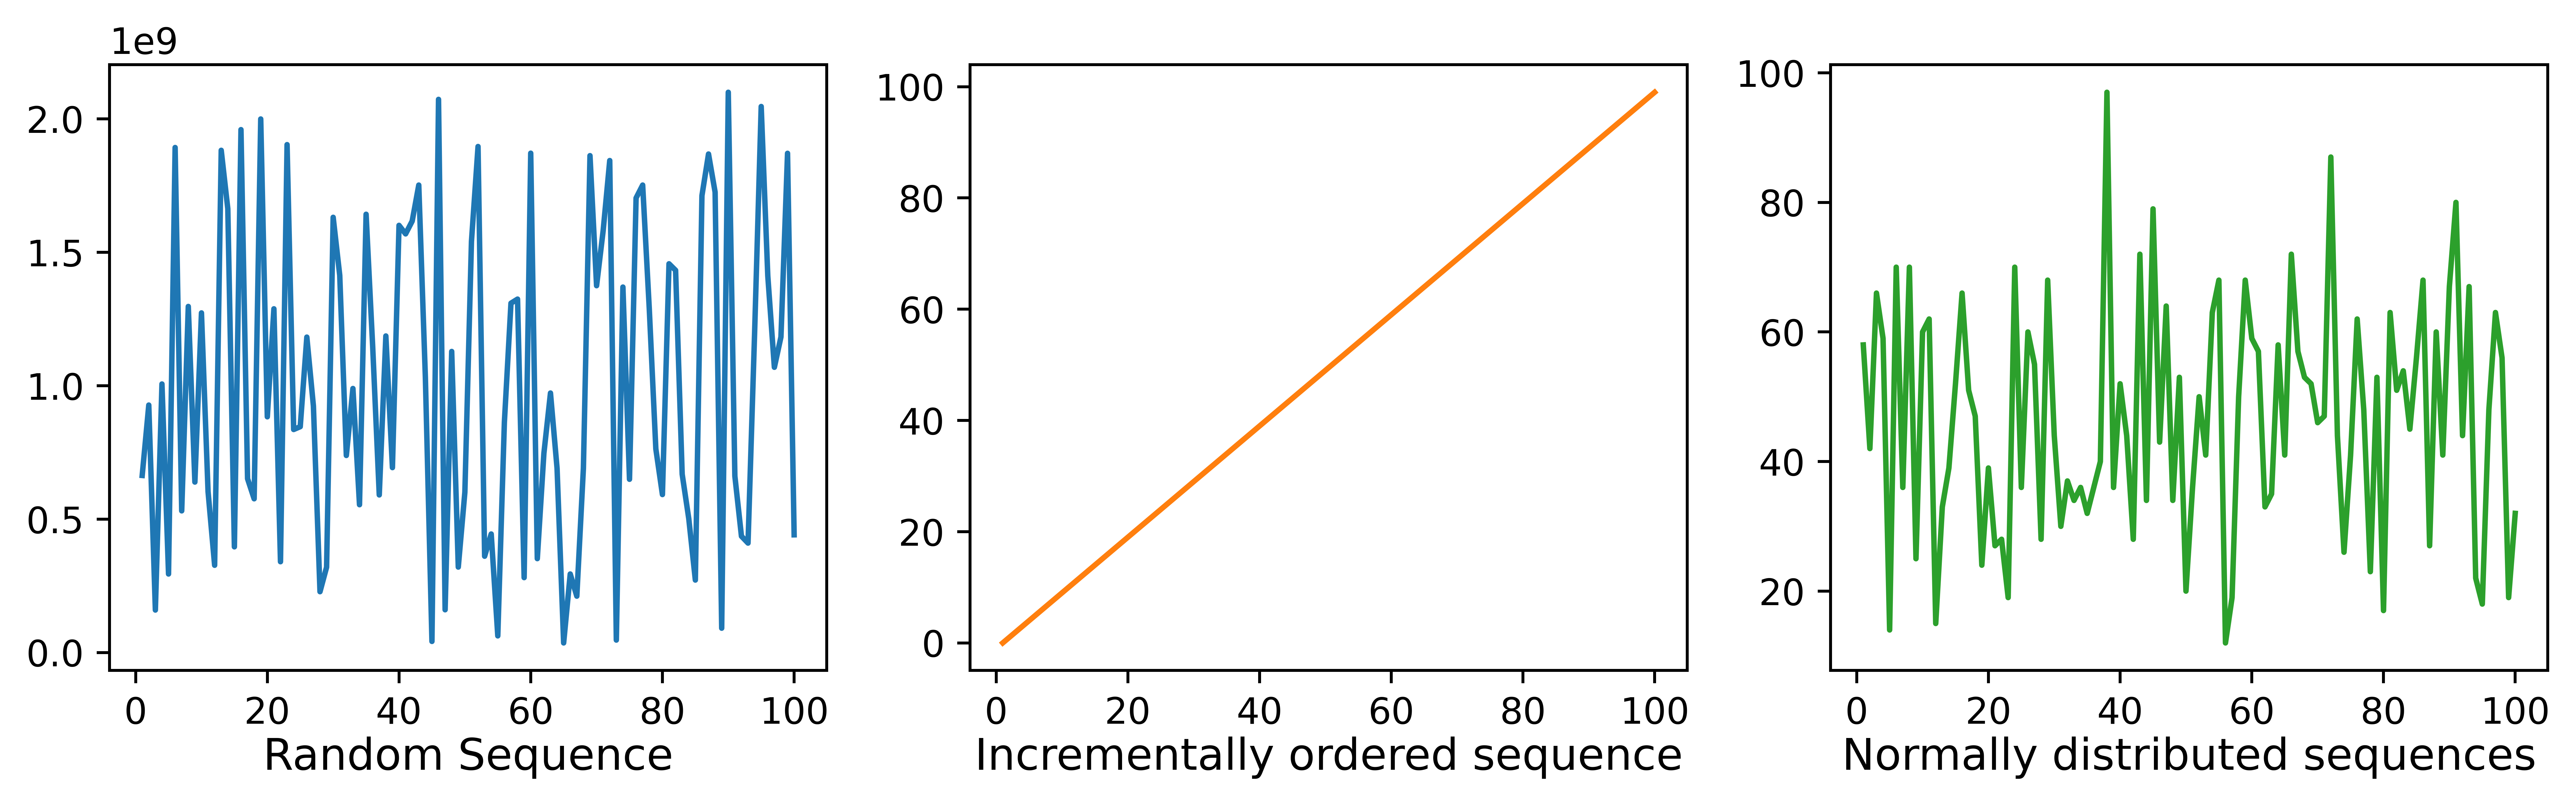

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import json
length = 100
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3), dpi=900)
x = np.arange(length) + 1
mu = length / 2
sigma = length / 6
samples = np.random.normal(mu, sigma, length)
samples = np.clip(samples, 0, 100)

y1 = np.random.randint(0, (1 << 31) - 1, length)
y2 = np.arange(0, length)
y3 = np.round(samples).astype(int)

ax[0].plot(x, y1, color="C0")
ax[0].set_title("Random Sequence", y=-0.2)
ax[1].plot(x, y2, color="C1")
ax[1].set_title("Incrementally ordered sequence", y=-0.2)
ax[2].plot(x, y3, color="C2")
ax[2].set_title("Normally distributed sequences", y=-0.2)
fig.savefig("img/distribution.png", bbox_inches="tight")

In [4]:
def draw(methods, distribution, ax):
    data = []
    for method in methods:
        with open(f"data/{method} in {distribution}.json", "r") as f:
            data.append(json.loads(f.read()))
    x_data = [list(d.keys()) for d in data]
    y_data = [list(d.values()) for d in data]
    linestyles = ["solid", "dashed", "dashdot", "dotted"]
    for i, t in enumerate(zip(x_data, y_data)):
        x, y = t
        x = [int(i) for i in x]
        ax.plot(x, y, label=methods[i], linestyle=linestyles[i])
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("Sequence length")
    ax.set_ylabel("Time(s)")
    ax.set_title(distribution)

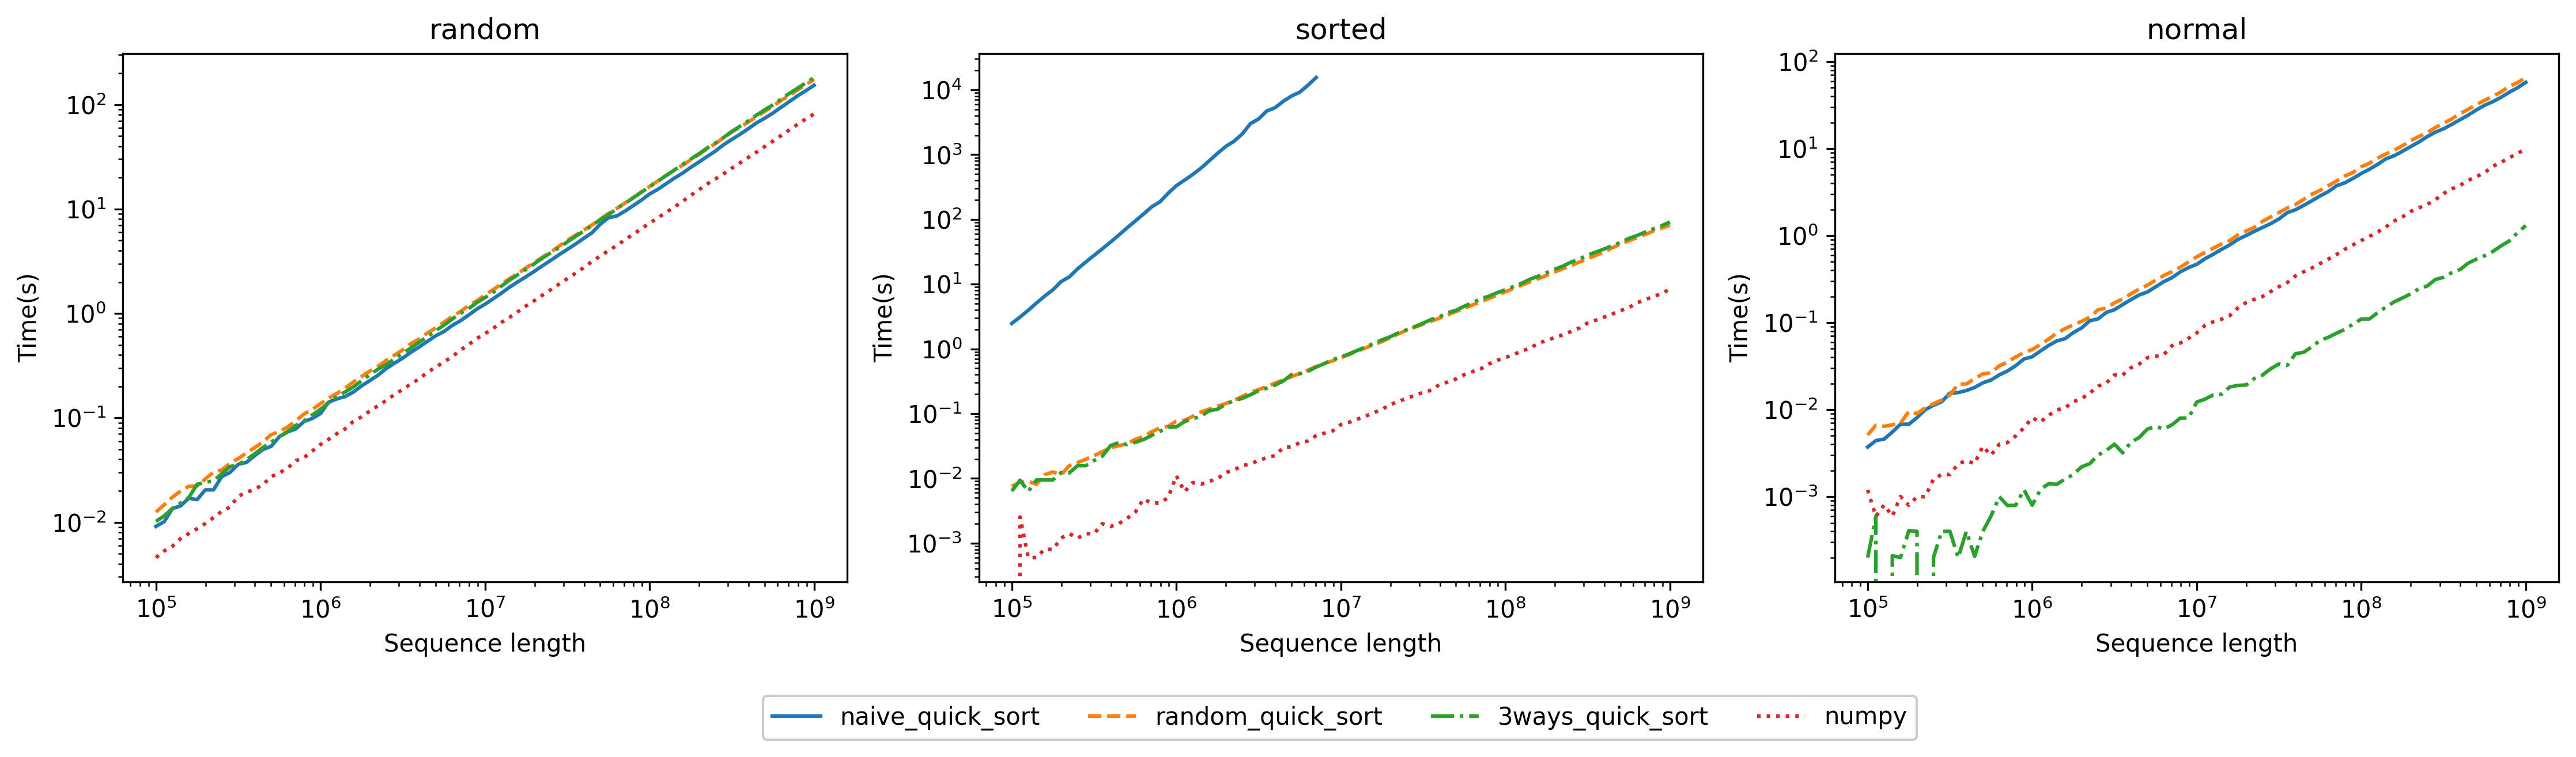

In [5]:
methods = [
    "naive_quick_sort",
    "random_quick_sort",
    "3ways_quick_sort",
    "numpy",
]
distributions = [
    "random",
    "sorted",
    "normal",
]
fig, ax = plt.subplots(1, 3, figsize=(15, 4), dpi=300)
for i, distribution in enumerate(distributions):
    draw(methods, distribution, ax[i])
lines, labels = ax[-1].get_legend_handles_labels()
fig.legend( lines, labels,           
            bbox_to_anchor=(0.52, -0.1),
            loc ="lower center",
            ncol=4, framealpha=1
)
plt.tight_layout()
fig.savefig("img/compare1.png", bbox_inches='tight')


In [5]:
def draw2(method, distributions, ax):
    data = []
    linestyles = [
        "solid",
        "dashed",
        "dashdot",
    ]
    for distribution in distributions:
        with open(f"data/{method} in {distribution}.json", "r") as f:
            data.append(json.loads(f.read()))
    x_data = [list(d.keys()) for d in data]
    y_data = [list(d.values()) for d in data]
    for i, t in enumerate(zip(x_data, y_data)):
        x, y = t
        x = [int(i) for i in x]
        ax.plot(x, y, label=distributions[i], linestyle=linestyles[i])
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("Sequence length")
    ax.set_ylabel("Time(s)")
    ax.set_title(method)

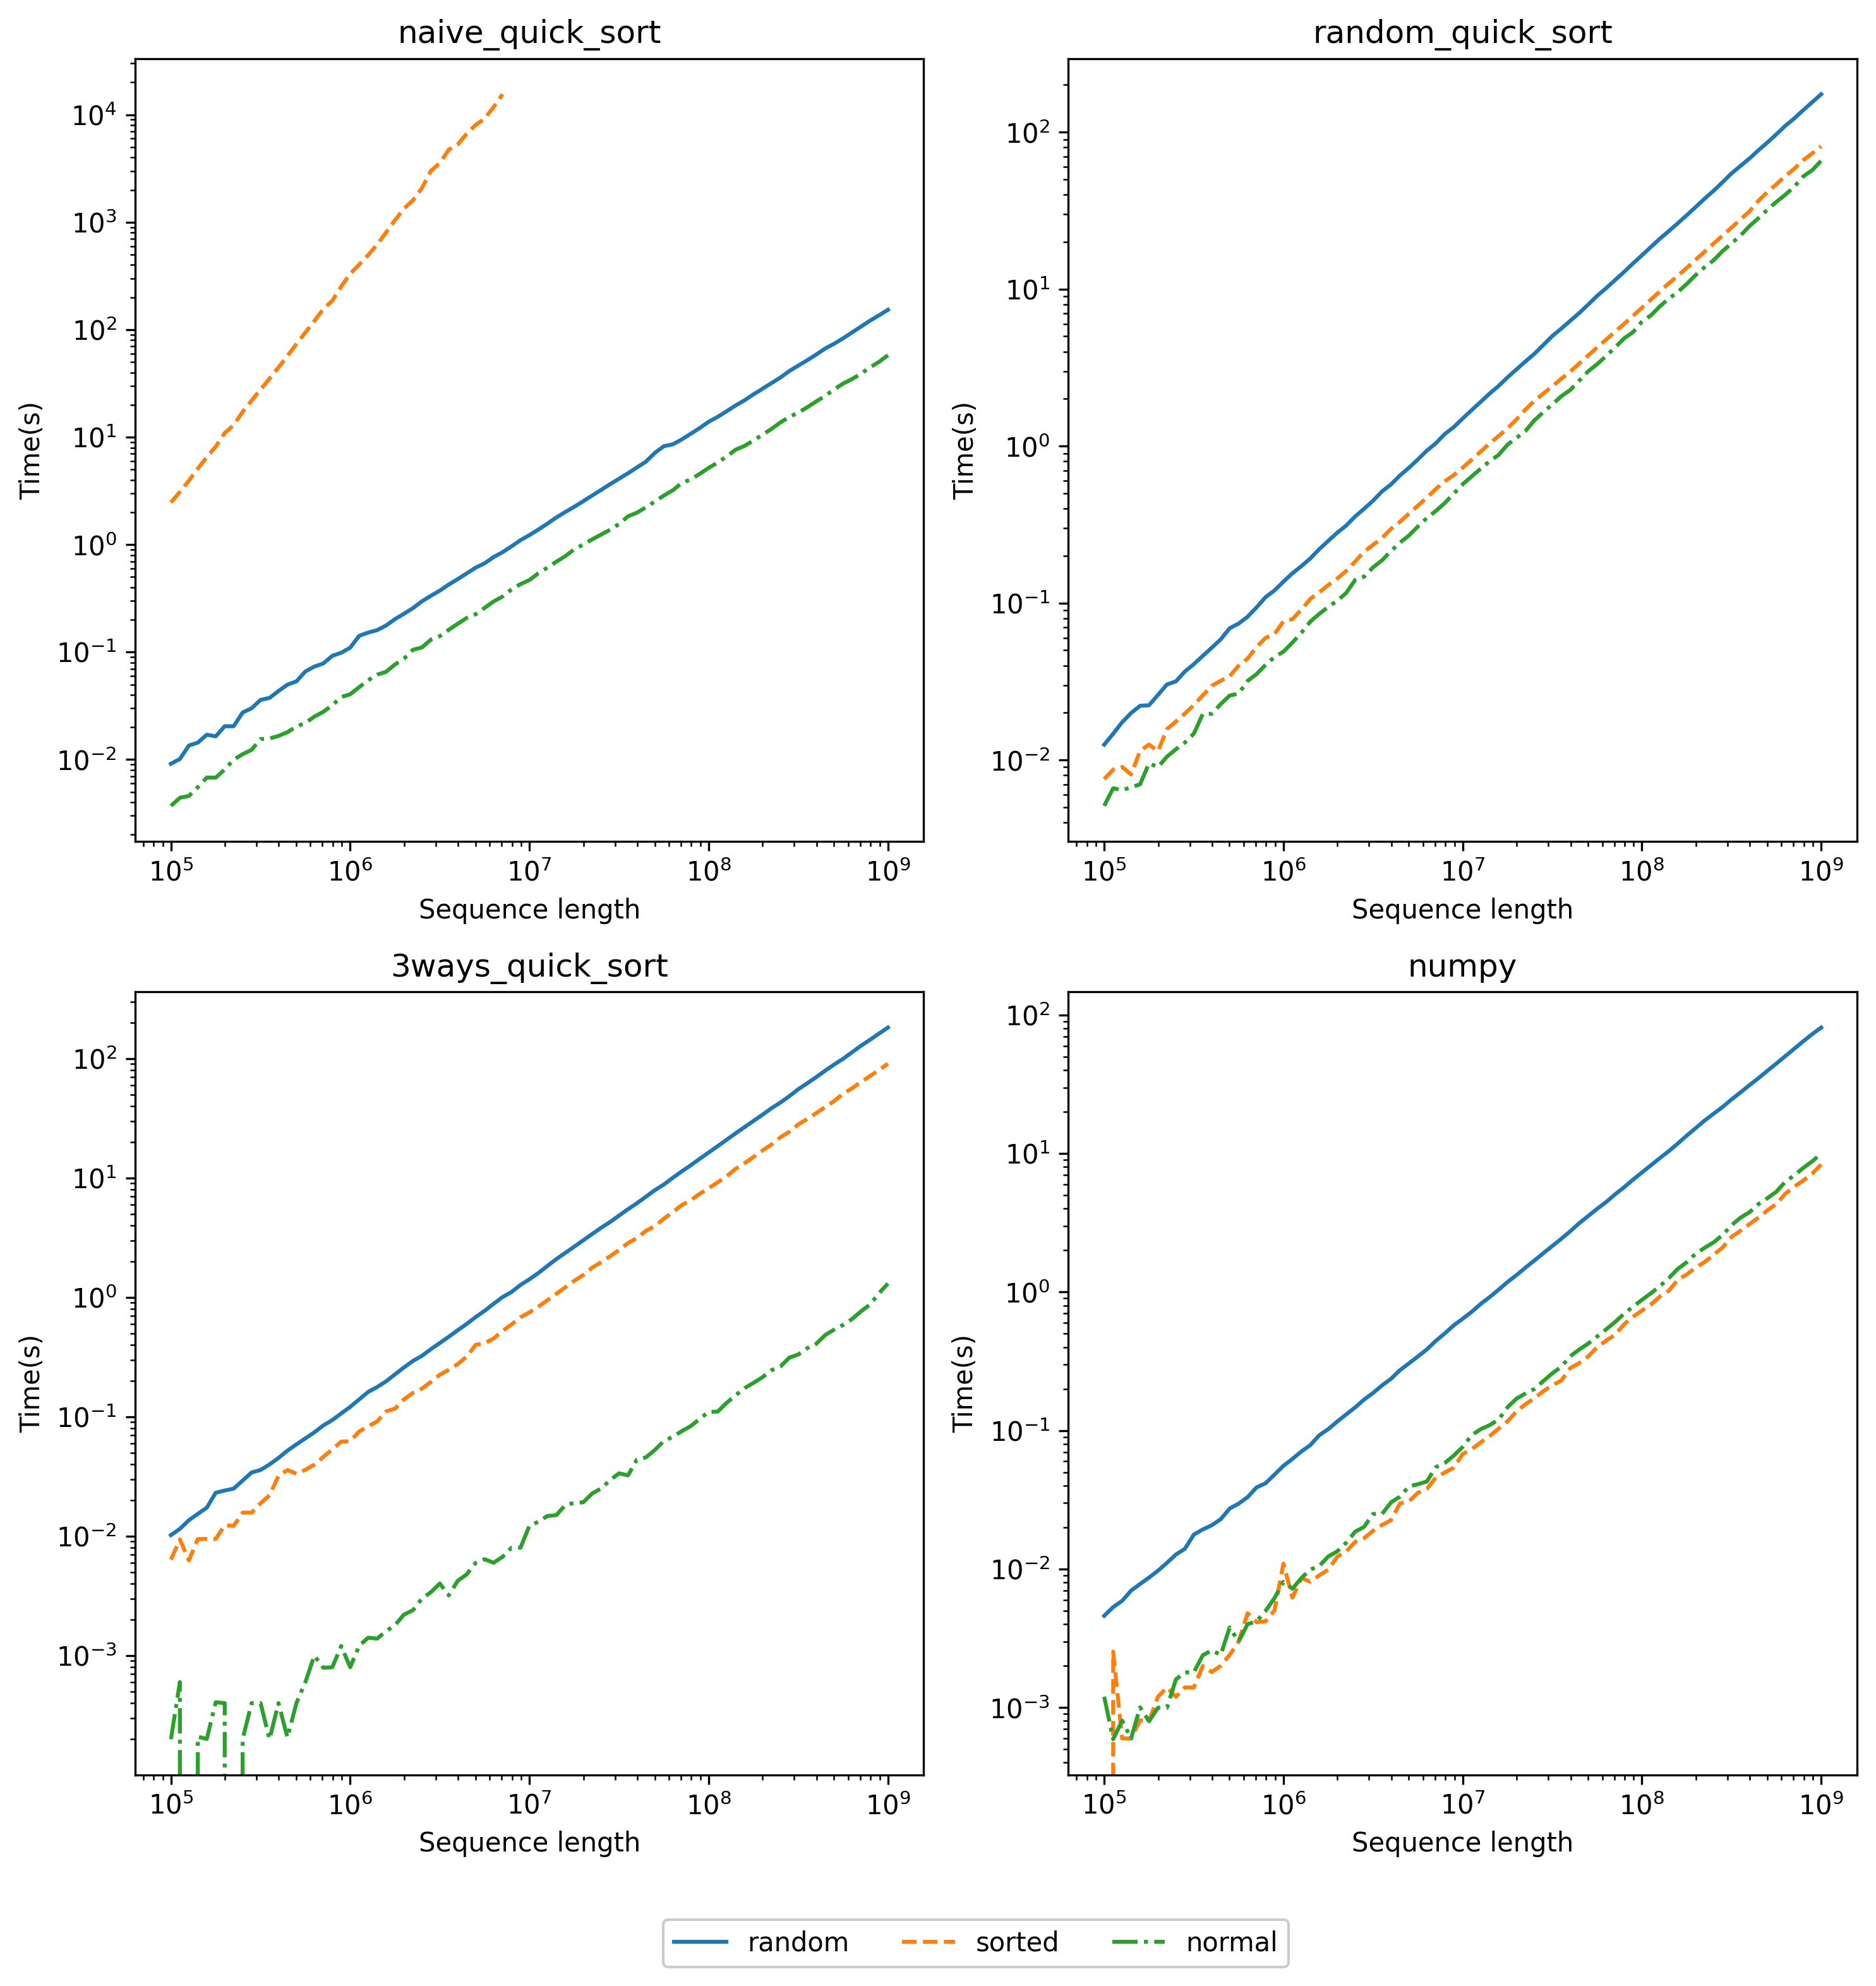

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), dpi=300)
for i in range(2):
    for j in range(2):
        draw2(methods[i * 2 + j], distributions, ax[i][j])
lines, labels = ax[-1][-1].get_legend_handles_labels()
fig.legend( lines, labels,           
            bbox_to_anchor=(0.52, -0.05),
            loc ="lower center",
            ncol=4, framealpha=1
)
plt.tight_layout()
fig.savefig("img/compare2.png", bbox_inches='tight')

In [24]:
import json

methods = [
    "naive_quick_sort",
    "random_quick_sort",
    "3ways_quick_sort",
    "numpy",
]
distributions = [
    "random",
    "sorted",
    "normal",
]
for distribution in distributions:
    for method in methods:
        with open(f"data/{method} in {distribution}.json", "r") as f:
            d = json.loads(f.read())
            a=[]
            if method=='naive_quick_sort' and distribution=='sorted':
                a.append(d['100000'])
                a.append(d['1000000'])
                a.append(d['7079457'])
            else:
                a.append(d['100000'])
                a.append(d['1000000'])
                a.append(d['10000000'])
                a.append(d['100000000'])
                a.append(d['1000000000'])
            print(method, distribution)
            for i in range(len(a)):
                #print(f"{a[i]:.3e}",end=' ')
                print(f"{a[i]:.3g}",end=' ')
            print("")
            #data.append(json.loads(f.read()))

naive_quick_sort random
0.00914 0.11 1.23 13.9 153 
random_quick_sort random
0.0125 0.137 1.5 16.4 174 
3ways_quick_sort random
0.0102 0.121 1.42 16.3 182 
numpy random
0.00459 0.0556 0.642 7.3 81.3 
naive_quick_sort sorted
2.47 331 1.55e+04 
random_quick_sort sorted
0.00756 0.0765 0.728 7.61 81.4 
3ways_quick_sort sorted
0.00635 0.0623 0.748 8.21 90.5 
numpy sorted
0 0.0109 0.0677 0.735 8.35 
naive_quick_sort normal
0.00371 0.0405 0.468 5.18 57.9 
random_quick_sort normal
0.0051 0.049 0.571 6.21 65.8 
3ways_quick_sort normal
0.000199 0.000798 0.0122 0.11 1.31 
numpy normal
0.0012 0.00807 0.0761 0.879 10 
